In [222]:
#import libraries
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size']=8
matplotlib.rcParams['figure.figsize']=(5,5)
import seaborn as sns
from IPython.core.pylabtools import figsize
import scipy
from scipy.stats import percentileofscore
from scipy import stats

# EDA
## Load data and examine the characteristcis

In [223]:
file_name='newedit.csv'
df_data=pd.read_csv(file_name, sep=',',index_col=None,encoding='ISO-8859-1')

In [224]:
print("The size of the dataset: ",df_data.shape)

The size of the dataset:  (67525, 16)


In [225]:
df_data.head(2).append(df_data.tail(2))

C:\Users\TracyCui\AppData\Local\Temp\ipykernel_4904\768104290.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data.head(2).append(df_data.tail(2))


,idex,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
0,1,google,none,11-Dec-18,Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0
1,2,google,"Mountain View, CA",21-Jun-13,Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094
67523,67528,microsoft,none,15-Dec-10,Current Employee - Senior Test Lead,"It's a competitive work place, with overload w...","Smart people around you, can learn from them","Politics, weak moral, leaning loyalty",none,3,2,none,3,3.5,3,0
67524,67529,microsoft,none,14-Dec-10,Former Employee - Senior Director,Used to be great,"Compensation, Health benefits and brand name r...",Leadership was better in the late 90's....its ...,Good people keep leaving...you have to ask you...,2,2,none,2,4,2,0


In [226]:
#check the data structure
print("Dataset Structure: ")
df_data.info()

Dataset Structure: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67525 entries, 0 to 67524
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   idex                        67525 non-null  int64 
 1   company                     67525 non-null  object
 2   location                    67525 non-null  object
 3   dates                       67525 non-null  object
 4   job-title                   67525 non-null  object
 5   summary                     67405 non-null  object
 6   pros                        67525 non-null  object
 7   cons                        67525 non-null  object
 8   advice-to-mgmt              67228 non-null  object
 9   overall-ratings             67525 non-null  int64 
 10  work-balance-stars          67525 non-null  object
 11  culture-values-stars        67525 non-null  object
 12  carrer-opportunities-stars  67525 non-null  object
 13  comp-benefit-stars        

In [227]:
#rename the long names
df_data.rename(columns={'overall-ratings':'overall'},inplace=True)
df_data.rename(columns={'work-balance-stars':'rating1'},inplace=True)
df_data.rename(columns={'culture-values-stars':'rating2'},inplace=True)
df_data.rename(columns={'carrer-opportunities-stars':'rating3'},inplace=True)
df_data.rename(columns={'comp-benefit-stars':'rating4'},inplace=True)
df_data.rename(columns={'senior-mangemnet-stars':'rating5'},inplace=True)

In [228]:
print('New Data Structure: ')
df_data.info()

New Data Structure: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67525 entries, 0 to 67524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idex            67525 non-null  int64 
 1   company         67525 non-null  object
 2   location        67525 non-null  object
 3   dates           67525 non-null  object
 4   job-title       67525 non-null  object
 5   summary         67405 non-null  object
 6   pros            67525 non-null  object
 7   cons            67525 non-null  object
 8   advice-to-mgmt  67228 non-null  object
 9   overall         67525 non-null  int64 
 10  rating1         67525 non-null  object
 11  rating2         67525 non-null  object
 12  rating3         67525 non-null  object
 13  rating4         67525 non-null  object
 14  rating5         67525 non-null  object
 15  helpful-count   67525 non-null  int64 
dtypes: int64(3), object(13)
memory usage: 8.2+ MB


In [229]:
#drop out the none value
df_data[df_data['rating1']=='none']

,idex,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall,rating1,rating2,rating3,rating4,rating5,helpful-count
15,16,google,none,6-Dec-18,Current Employee - Anonymous Employee,Review,The people are great to work with,There is lower compensation than expected,none,5,none,none,none,none,none,0
17,18,google,none,2-Dec-18,Former Employee - Anonymous Employee,Analysts,"Good managers, benefits , some support, nice a...","Long hours, far locations, a lot of work",none,5,none,none,2,none,none,1
22,23,google,none,1-Dec-18,Current Employee - Anonymous Employee,NaN,it's a great place to work!,too much red tape on doing even the smallest p...,none,5,none,none,5,none,none,0
23,24,google,none,30-Nov-18,Current Employee - Anonymous Employee,Software Engineer,Awesome job environment to work in,Pressure is there for some parts,none,5,none,none,none,none,none,0
29,30,google,none,20-Nov-18,Former Employee - Anonymous Employee,Great,"Great place to work, free food, and great cult...","Big company, prepare to move much slower than ...",none,5,none,none,none,none,none,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66946,66951,microsoft,none,1-Jun-12,Current Employee - Anonymous Employee,Great,They really know their computers but are way b...,Way behind apple computers having trouble keep...,Make an iPad copy cat,3,none,none,3,none,none,1
66952,66957,microsoft,none,4-Jun-12,Current Employee - Anonymous Employee,Good company with lots of opportunities,Lots of different roles available,Really big company with lots of red tape,None,4,none,none,none,none,none,0
66953,66958,microsoft,none,4-Jun-12,Former Employee - Anonymous Employee,Microsoft Research,A lot of freedom in choice of project. Great f...,"Not a lot of feedback from management, and not...",Provide employees with constant feedback.,4,none,none,none,none,none,0
66956,66961,microsoft,none,4-Jun-12,Current Employee - Anonymous Employee,Good company with lots of opportunities,Lots of different roles available,Really big company with lots of red tape,None,4,none,none,none,none,none,0


In [230]:
df_data = df_data.applymap(lambda x: x if x!='none' else np.nan)
df_data = df_data.dropna(subset=['rating1','rating2','rating3','rating4','rating5'])

In [231]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53218 entries, 0 to 66981
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idex            53218 non-null  int64 
 1   company         53218 non-null  object
 2   location        35711 non-null  object
 3   dates           53218 non-null  object
 4   job-title       53218 non-null  object
 5   summary         53135 non-null  object
 6   pros            53218 non-null  object
 7   cons            53217 non-null  object
 8   advice-to-mgmt  30371 non-null  object
 9   overall         53218 non-null  int64 
 10  rating1         53218 non-null  object
 11  rating2         53218 non-null  object
 12  rating3         53218 non-null  object
 13  rating4         53218 non-null  object
 14  rating5         53218 non-null  object
 15  helpful-count   53218 non-null  int64 
dtypes: int64(3), object(13)
memory usage: 6.9+ MB


In [232]:
dtypes={'rating1':'int64',
        'rating2':'int64',
        'rating3':'int64',
        'rating4':'int64',
        'rating5':'int64',
        'company':'string',
        'location':'string',
        'job-title':'string',
        'summary':'string',
        'pros':'string',
        'cons':'string',
        'advice-to-mgmt':'string'}

In [233]:
df_data=df_data.astype(dtypes)

In [234]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53218 entries, 0 to 66981
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idex            53218 non-null  int64 
 1   company         53218 non-null  string
 2   location        35711 non-null  string
 3   dates           53218 non-null  object
 4   job-title       53218 non-null  string
 5   summary         53135 non-null  string
 6   pros            53218 non-null  string
 7   cons            53217 non-null  string
 8   advice-to-mgmt  30371 non-null  string
 9   overall         53218 non-null  int64 
 10  rating1         53218 non-null  int64 
 11  rating2         53218 non-null  int64 
 12  rating3         53218 non-null  int64 
 13  rating4         53218 non-null  int64 
 14  rating5         53218 non-null  int64 
 15  helpful-count   53218 non-null  int64 
dtypes: int64(8), object(1), string(7)
memory usage: 6.9+ MB


In [235]:
#print the value counts for categorical variables
for col in df_data.columns:
    if df_data[col].dtype=='string':
        print('\nColumn Name: ',col,)
        print(df_data[col].value_counts())


Column Name:  company
amazon       22078
microsoft    13358
apple        10247
google        5604
facebook      1438
netflix        493
Name: company, dtype: Int64

Column Name:  location
Seattle, WA                            4074
Redmond, WA                            3940
Hyderabad (India)                      1953
Bengaluru (India)                      1506
Mountain View, CA                      1181
                                       ... 
Oakville, ON (Canada)                     1
Saint Peters, MO                          1
Twycross, England (UK)                    1
Barueri (Brazil)                          1
Srinagar, Jammu and Kashmir (India)       1
Name: location, Length: 1930, dtype: Int64

Column Name:  job-title
Current Employee - Anonymous Employee               11233
Former Employee - Anonymous Employee                 7629
Current Employee - Software Engineer                 1063
Current Employee - Software Development Engineer      694
Current Employee - Speciali

In [236]:
for i in ['rating1','rating2','rating3','rating4','rating5','overall']:
    print('Rating Distributions for column ', i)
    print(df_data[i].value_counts())

Rating Distributions for column  rating1
4    13631
3    12816
5    12727
2     7423
1     6621
Name: rating1, dtype: int64
Rating Distributions for column  rating2
5    21240
4    13509
3     9061
1     4748
2     4660
Name: rating2, dtype: int64
Rating Distributions for column  rating3
5    16890
4    15032
3    11827
2     5442
1     4027
Name: rating3, dtype: int64
Rating Distributions for column  rating4
5    19868
4    18118
3    10269
2     3196
1     1767
Name: rating4, dtype: int64
Rating Distributions for column  rating5
4    14406
3    12429
5    12202
2     7197
1     6984
Name: rating5, dtype: int64
Rating Distributions for column  overall
5    18843
4    17497
3     9717
2     3976
1     3185
Name: overall, dtype: int64


In [237]:
for i in ['rating1','rating2','rating3','rating4','rating5','overall']:
    print('Rating Distributions for column ', i)
    print(df_data[i].value_counts(normalize=True).apply(lambda x: '{:.2%}'.format(x)))

Rating Distributions for column  rating1
4    25.61%
3    24.08%
5    23.91%
2    13.95%
1    12.44%
Name: rating1, dtype: object
Rating Distributions for column  rating2
5    39.91%
4    25.38%
3    17.03%
1     8.92%
2     8.76%
Name: rating2, dtype: object
Rating Distributions for column  rating3
5    31.74%
4    28.25%
3    22.22%
2    10.23%
1     7.57%
Name: rating3, dtype: object
Rating Distributions for column  rating4
5    37.33%
4    34.04%
3    19.30%
2     6.01%
1     3.32%
Name: rating4, dtype: object
Rating Distributions for column  rating5
4    27.07%
3    23.35%
5    22.93%
2    13.52%
1    13.12%
Name: rating5, dtype: object
Rating Distributions for column  overall
5    35.41%
4    32.88%
3    18.26%
2     7.47%
1     5.98%
Name: overall, dtype: object


In [238]:
df_data['overall'].describe()

count    53218.000000
mean         3.842516
std          1.161621
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

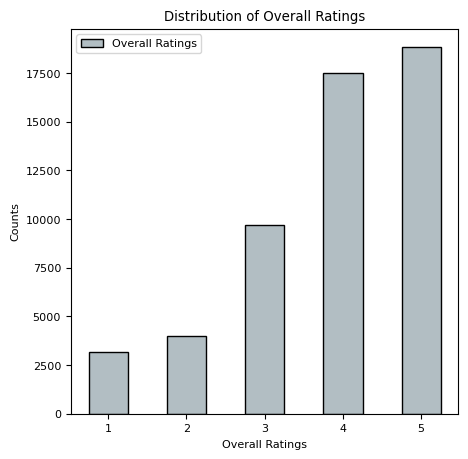

In [239]:
plt.bar(df_data['overall'].value_counts().index,df_data['overall'].value_counts().values, color = '#b2bec3', edgecolor = 'k', width = 0.5)
plt.xlabel('Overall Ratings');plt.ylabel('Counts');plt.title('Distribution of Overall Ratings')
plt.xticks(list(range(1, 6)))
plt.legend(['Overall Ratings'])
plt.show()

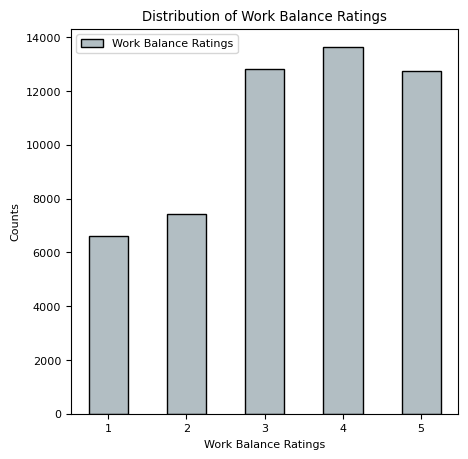

In [240]:
plt.bar(df_data['rating1'].value_counts().index,df_data['rating1'].value_counts().values, color = '#b2bec3', edgecolor = 'k', width = 0.5)
plt.xlabel('Work Balance Ratings');plt.ylabel('Counts');plt.title('Distribution of Work Balance Ratings')
plt.xticks(list(range(1, 6)))
plt.legend(['Work Balance Ratings'])
plt.show()

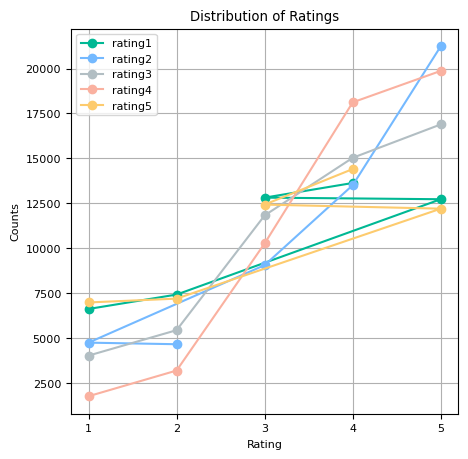

In [241]:
rating_counts=[df_data['rating1'].value_counts(),
               df_data['rating2'].value_counts(),
               df_data['rating3'].value_counts(),
               df_data['rating4'].value_counts(),
               df_data['rating5'].value_counts()]
colors = ['#00b894', '#74b9ff', '#b2bec3', '#fab1a0', '#fdcb6e']
for i, counts in enumerate(rating_counts):
    plt.plot(counts.index, counts.values, marker='o',color=colors[i])
    plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Distribution of Ratings')
plt.xticks(list(range(1, 6)))
plt.legend(['rating1', 'rating2', 'rating3', 'rating4', 'rating5'])
plt.grid()
plt.show()

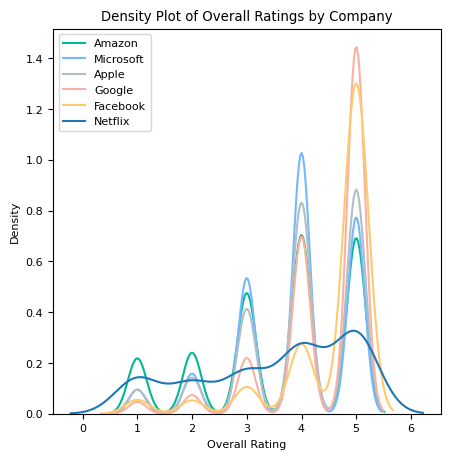

In [242]:
#Overall distribution by company
sns.kdeplot(df_data.loc[df_data['company'] == 'amazon', 'overall'], label = 'Amazon', shade = False,color='#00b894')
sns.kdeplot(df_data.loc[df_data['company'] == 'microsoft', 'overall'], label = 'Microsoft', shade = False, color='#74b9ff')
sns.kdeplot(df_data.loc[df_data['company'] == 'apple', 'overall'], label = 'Apple', shade = False, color='#b2bec3')
sns.kdeplot(df_data.loc[df_data['company'] == 'google', 'overall'], label = 'Google', shade = False,color='#fab1a0')
sns.kdeplot(df_data.loc[df_data['company'] == 'facebook', 'overall'], label = 'Facebook', shade = False,color='#fdcb6e')
sns.kdeplot(df_data.loc[df_data['company'] == 'netflix', 'overall'], label = 'Netflix', shade = False)
plt.xlabel('Overall Rating'); plt.ylabel('Density'); plt.title('Density Plot of Overall Ratings by Company')
plt.legend(loc='upper left')

In [243]:
#将职位名称筛选为current和former
df_data.loc[df_data['job-title'].str.startswith('Current Employee'), 'job-title'] = 'current'
df_data.loc[df_data['job-title'].str.startswith('Former Employee'), 'job-title'] = 'former'

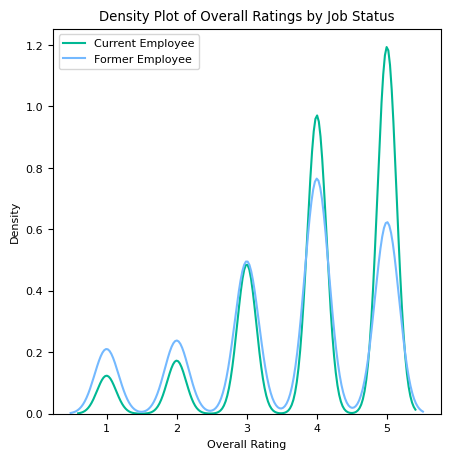

In [244]:
sns.kdeplot(df_data.loc[df_data['job-title'] == 'current', 'overall'], label = 'Current Employee', shade = False,color='#00b894')
sns.kdeplot(df_data.loc[df_data['job-title'] == 'former', 'overall'], label = 'Former Employee', shade = False, color='#74b9ff')
plt.xlabel('Overall Rating'); plt.ylabel('Density'); plt.title('Density Plot of Overall Ratings by Job Status')
plt.legend(loc='upper left')

In [247]:
from datetime import datetime
df_data['date'] = df_data['dates'].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))
print(df_data['date'])

0       2018-12-11
1       2013-06-21
2       2014-05-10
3       2015-02-08
4       2018-07-19
           ...    
66969   2012-06-12
66972   2012-05-27
66973   2012-06-08
66976   2012-05-25
66981   2012-05-26
Name: date, Length: 53218, dtype: datetime64[ns]


In [250]:
df_mean = df_data.groupby('date')['overall'].mean().reset_index()
df_mean.to_csv('average_overallrating.csv', index=False)

In [256]:
overall_file = pd.read_csv('average_overallrating.csv')

In [257]:
overall_file.tail(5).append(overall_file.head(5))

C:\Users\TracyCui\AppData\Local\Temp\ipykernel_4904\2079090464.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_file.tail(5).append(overall_file.head(5))


,date,overall
2389,2018-12-07,3.875000
2390,2018-12-08,3.920000
2391,2018-12-09,4.266667
2392,2018-12-10,3.916667
2393,2018-12-11,3.652174
0,2012-05-23,4.333333
1,2012-05-24,3.714286
2,2012-05-25,3.571429
3,2012-05-26,3.500000
4,2012-05-27,4.000000


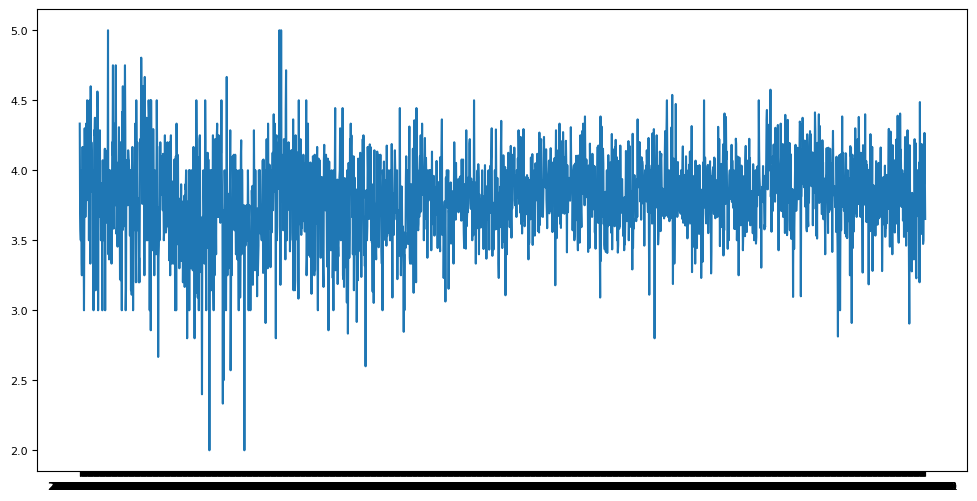

In [261]:
import matplotlib.ticker as ticker
plt.plot(overall_file['date'],overall_file['overall'])
plt.gcf().set_size_inches(12, 6)
plt.show()

In [263]:
overall_file["year"] = pd.to_datetime(overall_file["date"]).dt.year

# 按年份对 overall ratings 求和
sum_ratings = overall_file.groupby("year")["overall"].sum()

# 计算每年的平均评分
avg_ratings = sum_ratings / overall_file.groupby("year").size()

# 将结果保存到输出文件
avg_ratings.to_csv("output.csv", header=["average ratings"])

In [264]:
overallaverage_file = pd.read_csv('averageoverall.csv')

Text(0.5, 1.0, 'Average Overall Rating By Year')

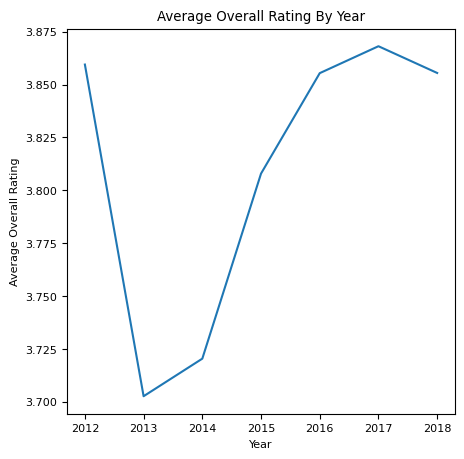

In [267]:
plt.plot(overallaverage_file['year'],overallaverage_file['average ratings'])
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating By Year')

<AxesSubplot:title={'center':'overall'}, xlabel='[company]'>

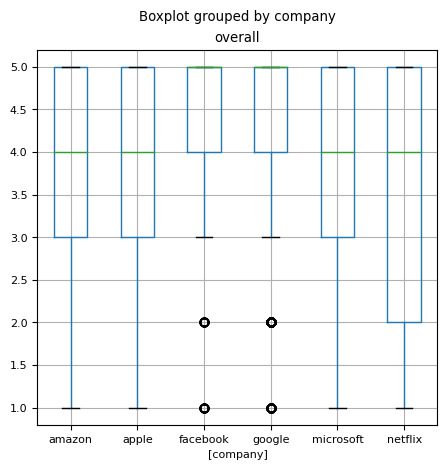

In [271]:
df_data.boxplot(column=['overall'], by=['company'])

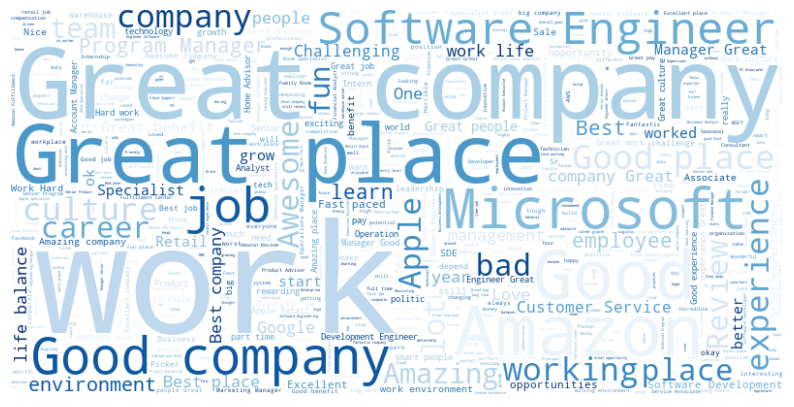

In [275]:
#summary词云
from wordcloud import WordCloud
df_data.dropna(subset=["summary"], inplace=True)
text = " ".join(review for review in df_data.summary)
wordcloud = WordCloud(background_color="white", max_words=2000, width=800, height=400, colormap='Blues')
wordcloud.generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [276]:
#相关性分析
df_data.corr()['overall'].sort_values()

helpful-count   -0.042191
idex             0.003943
rating4          0.537985
rating1          0.612248
rating3          0.686163
rating5          0.725729
rating2          0.758800
overall          1.000000
Name: overall, dtype: float64